<a href="https://colab.research.google.com/github/MuhammadRivaldiAsyhari/Day-Extra-Class-9/blob/main/Task_DEC_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# URL dataset
url = "https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv"

# Load dataset
df = pd.read_csv(url)
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Tampilkan informasi awal tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

# 1.a

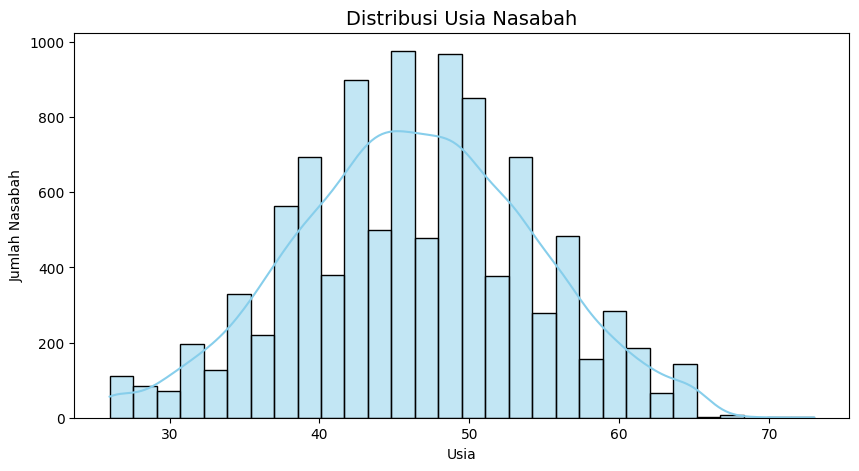

<ipython-input-13-3c5f01ae3060>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["customer_age"], y=df["churn"], ci=None, marker="o", color="red")


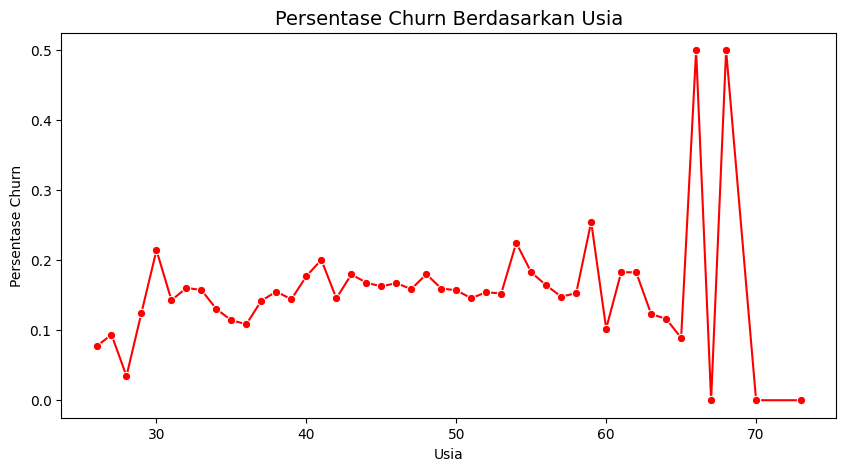

In [ ]:
# Tambahkan kolom churn (1 untuk Attrited Customer, 0 untuk Existing Customer)
df["churn"] = df["attrition_flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

# Visualisasi distribusi usia nasabah
plt.figure(figsize=(10, 5))
sns.histplot(df["customer_age"], bins=30, kde=True, color="skyblue")
plt.title("Distribusi Usia Nasabah", fontsize=14)
plt.xlabel("Usia")
plt.ylabel("Jumlah Nasabah")
plt.show()

# Analisis hubungan usia dengan churn
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["customer_age"], y=df["churn"], ci=None, marker="o", color="red")
plt.title("Persentase Churn Berdasarkan Usia", fontsize=14)
plt.xlabel("Usia")
plt.ylabel("Persentase Churn")
plt.show()



```
Dari hasil visualisasi:

1.   Distribusi Usia: Mayoritas nasabah berusia antara 40 hingga 60 tahun.
2.   Persentase Churn Berdasarkan Usia: Tidak ada tren yang terlalu jelas,
     tetapi terdapat lonjakan churn di beberapa kelompok usia tertentu,
     terutama di sekitar usia 50 tahun.

```



# 1.b

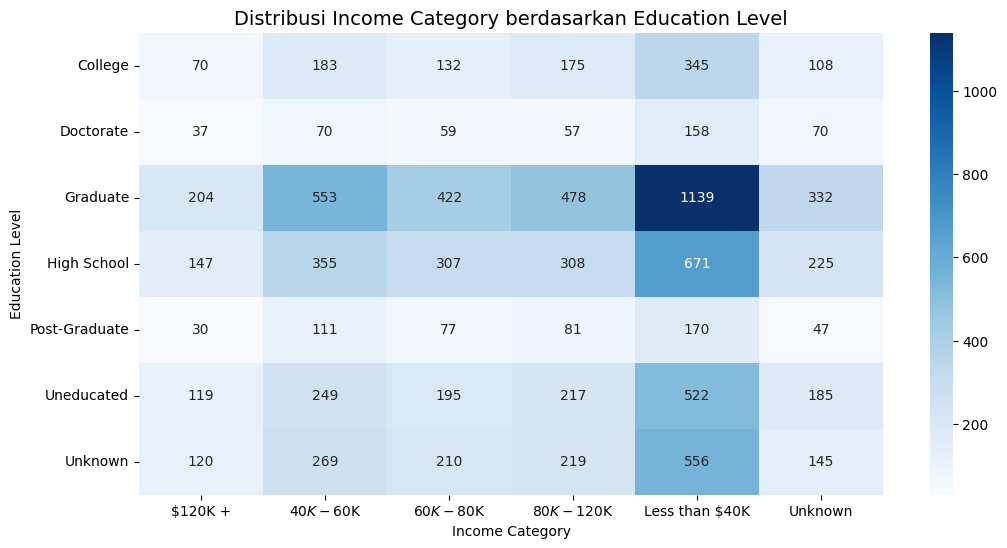

<ipython-input-14-8ba076735e8c>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="education_level", y="churn", hue="income_category", data=df, ci=None)


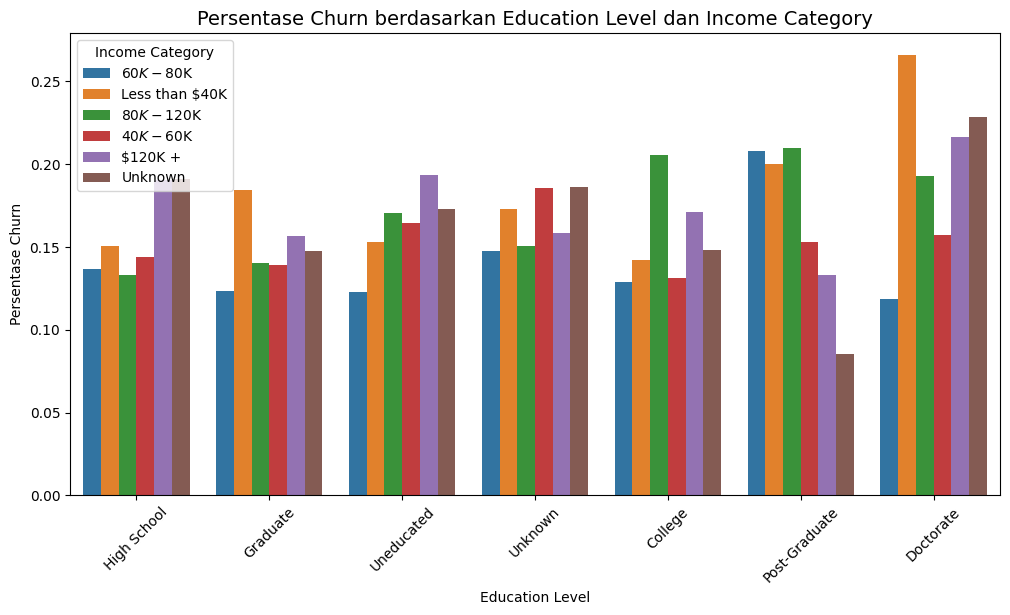

In [ ]:
# Buat pivot table untuk melihat distribusi income category berdasarkan education level
income_edu_pivot = df.pivot_table(index="education_level", columns="income_category", aggfunc="size", fill_value=0)

# Visualisasi heatmap korelasi education level vs income category
plt.figure(figsize=(12, 6))
sns.heatmap(income_edu_pivot, cmap="Blues", annot=True, fmt="d")
plt.title("Distribusi Income Category berdasarkan Education Level", fontsize=14)
plt.xlabel("Income Category")
plt.ylabel("Education Level")
plt.show()

# Analisis hubungan education level dan income category terhadap churn
plt.figure(figsize=(12, 6))
sns.barplot(x="education_level", y="churn", hue="income_category", data=df, ci=None)
plt.xticks(rotation=45)
plt.title("Persentase Churn berdasarkan Education Level dan Income Category", fontsize=14)
plt.xlabel("Education Level")
plt.ylabel("Persentase Churn")
plt.legend(title="Income Category")
plt.show()




```
Dari hasil analisis:

1. Korelasi antara tingkat pendidikan dan kategori pendapatan:

  - Umumnya, semakin tinggi tingkat pendidikan,
    semakin besar kemungkinan seseorang memiliki pendapatan lebih tinggi.
  - Namun, ada distribusi yang cukup bervariasi,
    terutama di kategori "Unknown" yang mungkin menunjukkan data yang tidak lengkap.

2. Pengaruh terhadap churn:

  - Nasabah dengan tingkat pendidikan lebih rendah tampaknya memiliki tingkat   
    churn yang lebih tinggi.
  - Kategori pendapatan juga berpengaruh terhadap churn,
    di mana nasabah dengan pendapatan lebih rendah cenderung memiliki tingkat churn yang lebih tinggi.
```



# 1.c

<ipython-input-15-efaacfb7c837>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="gender", y="churn", data=df, ci=None, palette="coolwarm")
<ipython-input-15-efaacfb7c837>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="churn", data=df, ci=None, palette="coolwarm")


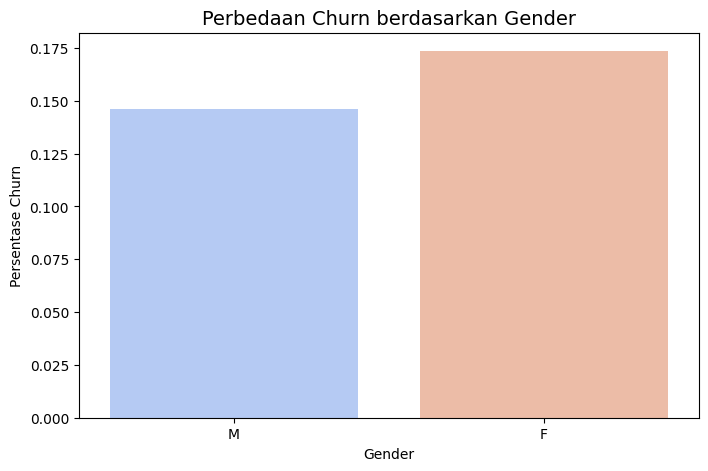

In [ ]:
# Visualisasi perbedaan churn berdasarkan gender
plt.figure(figsize=(8, 5))
sns.barplot(x="gender", y="churn", data=df, ci=None, palette="coolwarm")
plt.title("Perbedaan Churn berdasarkan Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Persentase Churn")
plt.show()



```
Dari hasil analisis,
terlihat bahwa perbedaan churn berdasarkan gender tidak terlalu signifikan.

Namun,
ada sedikit kecenderungan bahwa salah satu gender memiliki tingkat churn yang lebih tinggi.
```



# 1.d

<ipython-input-16-19adfe822869>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["months_on_book"], y=df["churn"], ci=None, marker="o", color="purple")


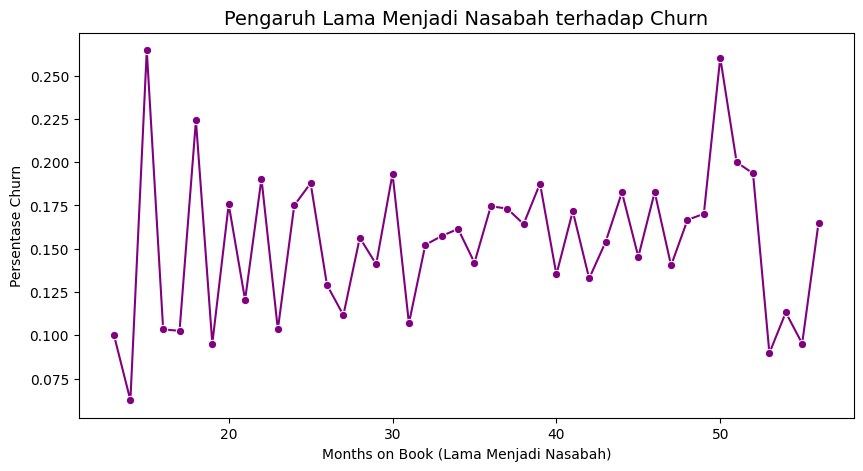

In [ ]:
# Visualisasi hubungan antara lama menjadi nasabah (months_on_book) dan churn
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["months_on_book"], y=df["churn"], ci=None, marker="o", color="purple")
plt.title("Pengaruh Lama Menjadi Nasabah terhadap Churn", fontsize=14)
plt.xlabel("Months on Book (Lama Menjadi Nasabah)")
plt.ylabel("Persentase Churn")
plt.show()



```
Dari hasil analisis, terlihat bahwa semakin lama seorang nasabah menjadi pelanggan bank,
cenderung semakin kecil kemungkinan mereka untuk churn.

Namun, ada beberapa lonjakan churn pada rentang tertentu yang mungkin perlu dianalisis lebih lanjut.
```



# 1.e

<ipython-input-17-37758b7711fc>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="contacts_count_12_mon", y="churn", data=df, ci=None, palette="viridis")
<ipython-input-17-37758b7711fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="contacts_count_12_mon", y="churn", data=df, ci=None, palette="viridis")


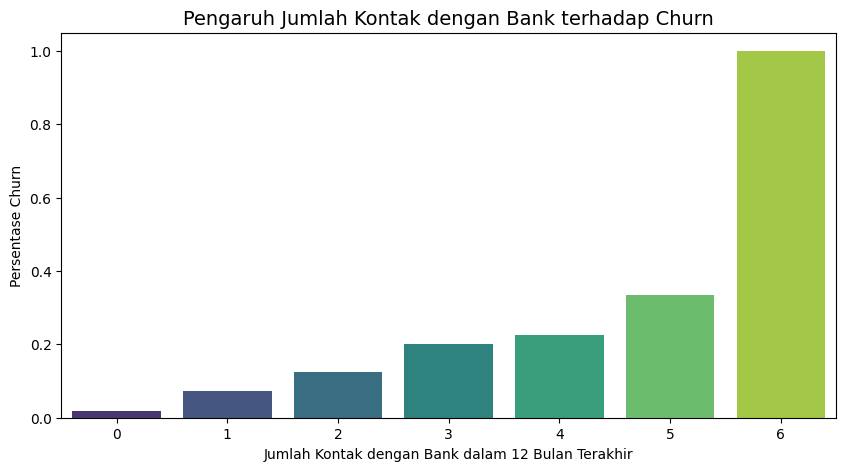

In [ ]:
# Visualisasi hubungan antara jumlah interaksi (contacts_count_12_mon) dan churn
plt.figure(figsize=(10, 5))
sns.barplot(x="contacts_count_12_mon", y="churn", data=df, ci=None, palette="viridis")
plt.title("Pengaruh Jumlah Kontak dengan Bank terhadap Churn", fontsize=14)
plt.xlabel("Jumlah Kontak dengan Bank dalam 12 Bulan Terakhir")
plt.ylabel("Persentase Churn")
plt.show()



```
Dari hasil analisis, terlihat bahwa semakin sering nasabah berinteraksi dengan bank
dalam 12 bulan terakhir,kemungkinan churn mereka cenderung lebih rendah.

Namun, ada sedikit kenaikan churn pada nasabah dengan interaksi yang sangat tinggi,
yang mungkin menunjukkan keluhan atau masalah layanan.
```



# 2

In [ ]:
features = [
    "customer_age", "dependent_count", "months_on_book", "total_relationship_count",
    "months_inactive_12_mon", "contacts_count_12_mon", "credit_limit", "total_revolving_bal",
    "avg_open_to_buy", "total_amt_chng_q4_q1", "total_trans_amt", "total_trans_ct",
    "total_ct_chng_q4_q1", "avg_utilization_ratio"
]

# Encode categorical variables
df_encoded = df.copy()
categorical_features = ["gender", "education_level", "marital_status", "income_category", "card_category"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])  # Encode kategori ke bentuk numerik
    label_encoders[col] = le
    features.append(col)

# Definisikan X (features) dan y (target)
X = df_encoded[features]
y = df_encoded["churn"]

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi data numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Buat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluasi model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)
print("Accuracy Score:", accuracy)

# Analisis feature importance dari model Random Forest
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.93      0.78      0.85       325

    accuracy                           0.96      2026
   macro avg       0.95      0.89      0.91      2026
weighted avg       0.96      0.96      0.95      2026

Confusion Matrix:
 [[1682   19]
 [  70  255]]
ROC AUC Score: 0.9859810970922084
Accuracy Score: 0.956071076011846


# 3

<ipython-input-19-33794142d6ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="coolwarm")


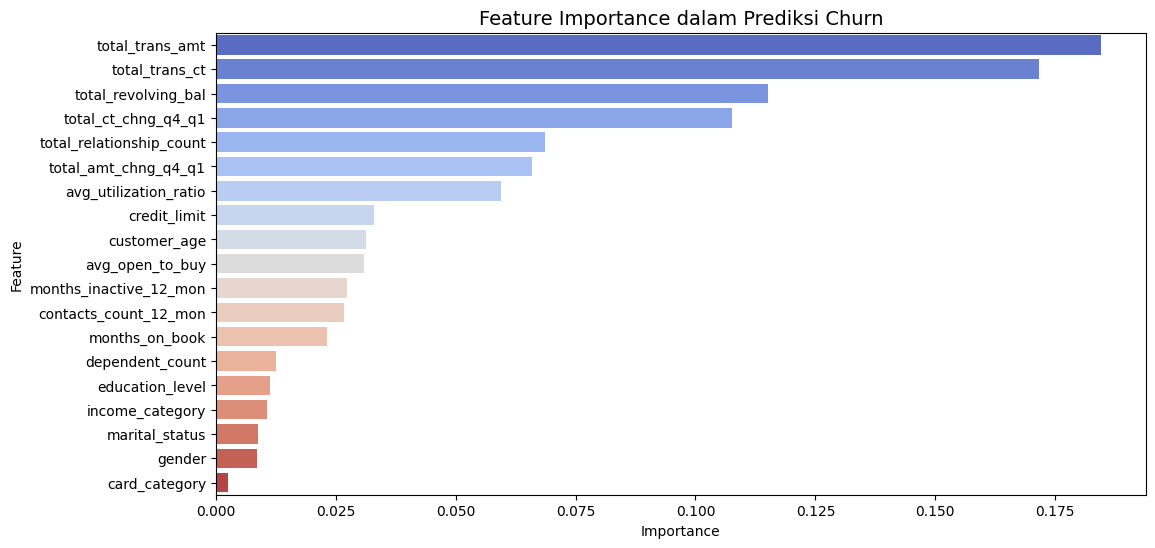

                     Feature  Importance
10           total_trans_amt    0.184639
11            total_trans_ct    0.171572
7        total_revolving_bal    0.115203
12       total_ct_chng_q4_q1    0.107664
3   total_relationship_count    0.068699


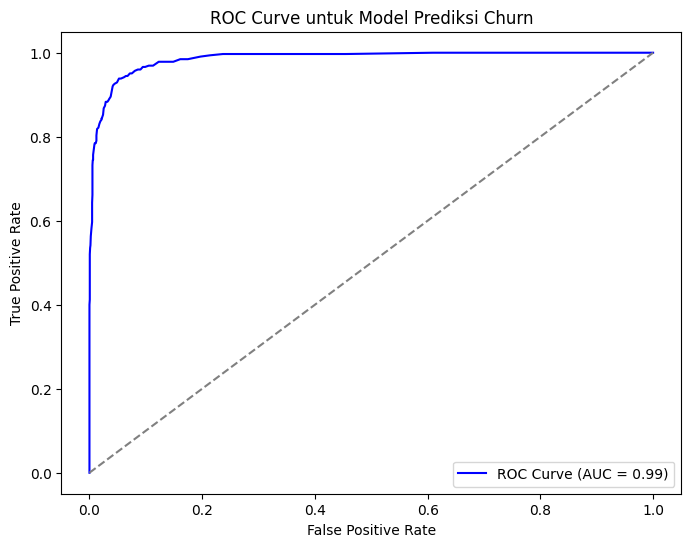

In [ ]:
# Visualisasi feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="coolwarm")
plt.title("Feature Importance dalam Prediksi Churn", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Tampilkan 5 fitur teratas
print(feature_importance_df.head(5))

# Visualisasi ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve untuk Model Prediksi Churn")
plt.legend()
plt.show()

# 4

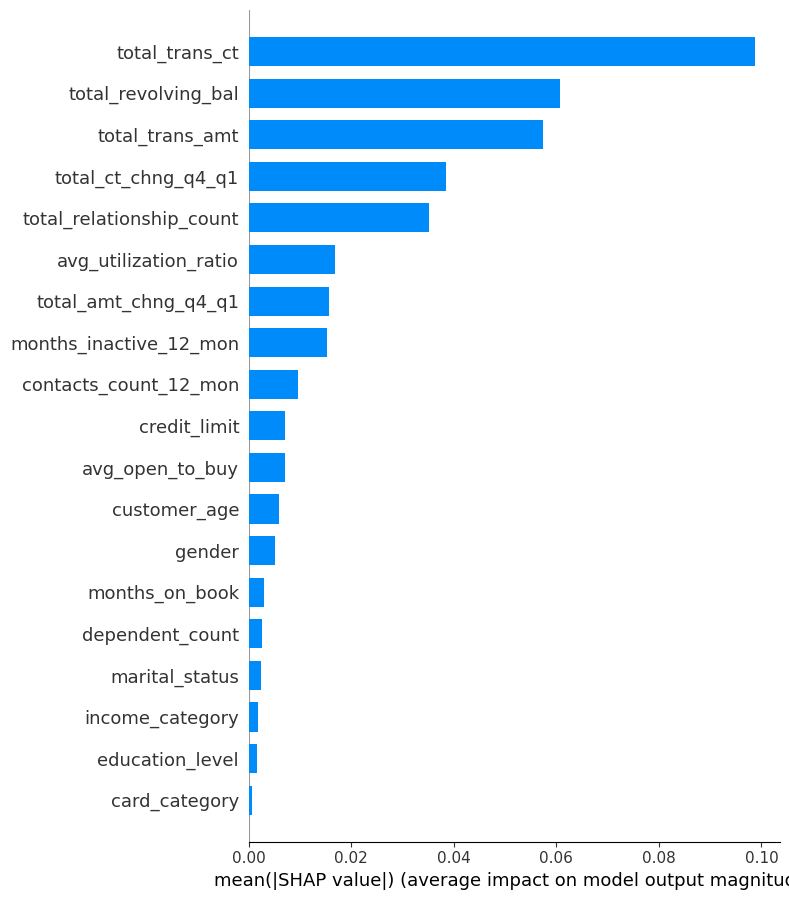

In [65]:
import shap

# Simpan nama fitur sebelum transformasi
feature_names = X.columns.tolist()

# Pastikan X_train dan X_test dalam bentuk DataFrame sebelum scaling
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Menggunakan SHAP TreeExplainer untuk model RandomForest
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_df)

# Jika model adalah binary classifier, gunakan hanya kelas positif
if isinstance(shap_values, list) and len(shap_values) > 1:
    shap_values = shap_values[1]

# Pastikan jumlah fitur sesuai dengan SHAP values
assert shap_values.shape[0] == X_test_df.shape[0], "Jumlah sampel tidak cocok!"
assert shap_values.shape[1] == X_test_df.shape[1], "Jumlah fitur tidak cocok!"

# Visualisasi Feature Importance dengan SHAP
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values[:, :, 1], X_test_df, plot_type="bar")
#shap.summary_plot(shap_values, X_test_df, plot_type="bar")



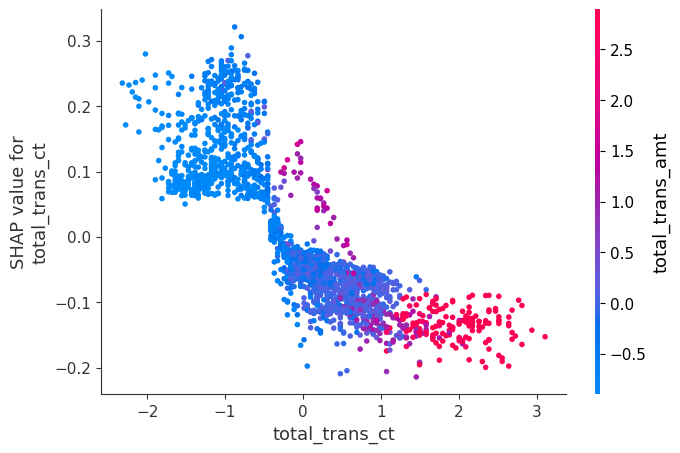

In [66]:
# Visualisasi SHAP Dependence Plot untuk salah satu fitur penting
shap_values = shap_values[:, :, 1]  # Pilih hanya SHAP untuk kelas positif

shap.dependence_plot("total_trans_ct", shap_values, X_test_df)
plt.show()

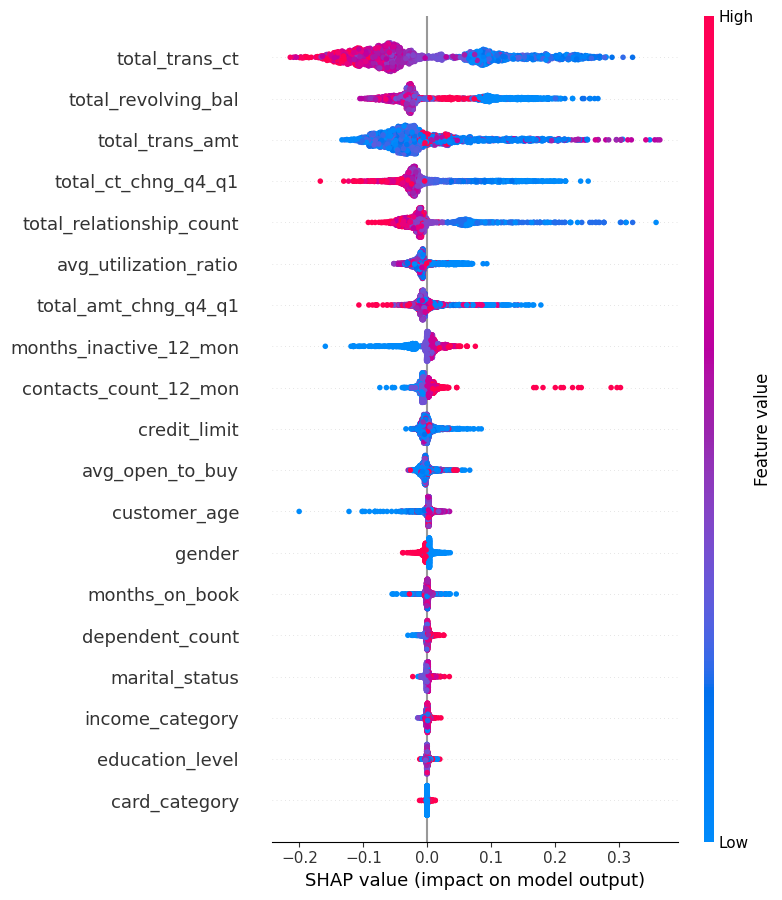

In [67]:
# Visualisasi SHAP Summary Plot
shap.summary_plot(shap_values, X_test_df)